[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Notas_Estructuradas/blob/main/Sesion03_NotasE_Interes_Rate_Swap.ipynb)

# Swaps (y PPO [programación orientada a objetos])

# Tasa Forward

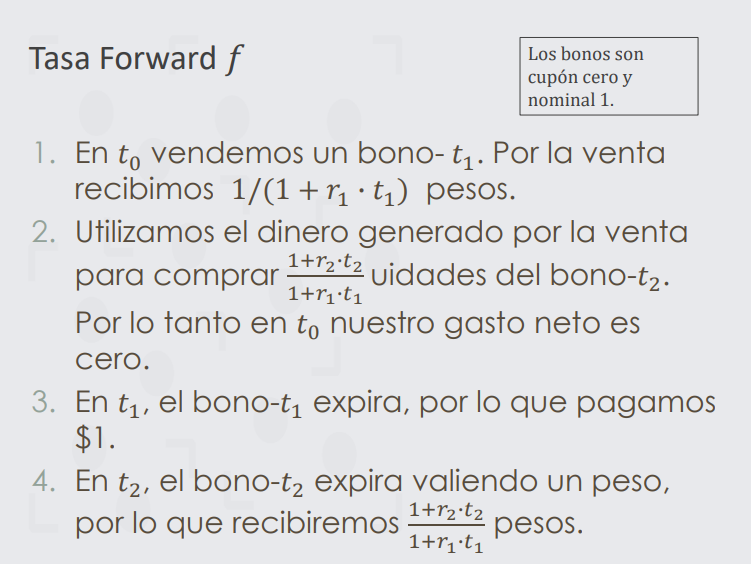

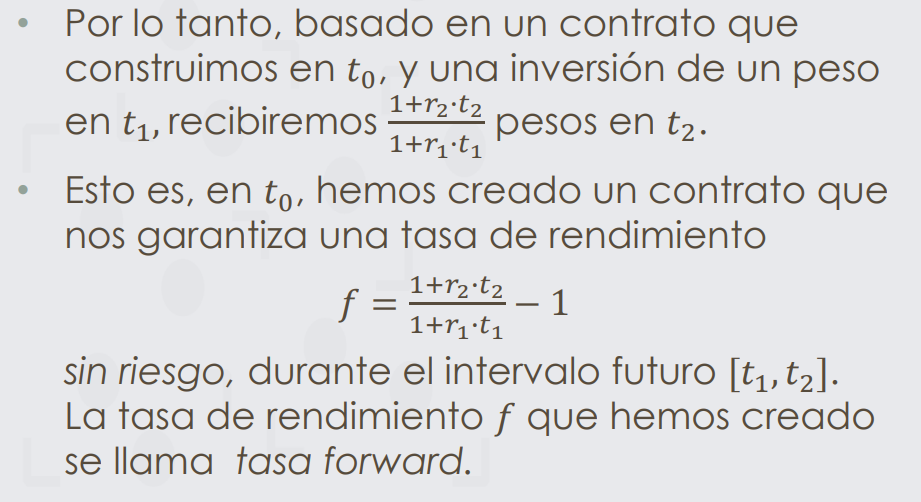

In [ ]:
import numpy as np

In [ ]:
def tasa_forward(t1, t2, S_t1, S_t2):
    """
    Calcula la tasa forward entre dos periodos t1 y t2.

    Parámetros:
    - t1: Periodo inicial (en años, por ejemplo, 0.5 para 6 meses).
    - t2: Periodo final (en años).
    - S_t1: Tasa spot para el periodo t1 (en forma decimal, ej. 0.03 para 3%).
    - S_t2: Tasa spot para el periodo t2 (en forma decimal).

    Retorna:
    - Tasa forward (en forma decimal).
    """
    if t1 >= t2:
        raise ValueError("t1 debe ser menor que t2")

    # Fórmula de tasa forward
    numerador = (1 + S_t2 * t2)
    denominador = (1 + S_t1 * t1)
    forward_rate = (numerador / denominador) - 1

    return forward_rate

# Ejemplo
t1 = 1  # 1 año
t2 = 2  # 2 años
S_t1 = 0.03  # Tasa spot 1 (3%)
S_t2 = 0.035  # Tasa spot 2 (3.5%)

forward_rate = tasa_forward(t1, t2, S_t1, S_t2)
print(f"Tasa forward entre {t1} y {t2} años: {forward_rate:.4%}")


Tasa forward entre 1 y 2 años: 3.8835%


In [ ]:
tasa_forward(t2, t1, S_t1, S_t2)

ValueError: t1 debe ser menor que t2

También, si tenemos los factores de descuento:

$$ df_j = \dfrac{1}{1 + r_j*t_j}$$

podemos escribir la tasa forward en terminos de los factores de descuento:

$$ f_j = \dfrac{df_{j-1}}{df_j} -1 $$

In [ ]:
def tasa_forward_desde_descuento(D_t1, D_t2):
    """
    Calcula la tasa forward a partir de los factores de descuento.

    Parámetros:
    - D_t1: Factor de descuento para el periodo t1.
    - D_t2: Factor de descuento para el periodo t2.

    Retorna:
    - Tasa forward entre t1 y t2 (en forma decimal).
    """
    if D_t1 <= 0 or D_t2 <= 0:
        raise ValueError("Los factores de descuento deben ser mayores que 0")

    # Fórmula de tasa forward
    forward_rate = (D_t1 / D_t2) - 1

    return forward_rate

# Ejemplo
D_t1 = 0.95  # Factor de descuento para t1 (por ejemplo, 1 año)
D_t2 = 0.90  # Factor de descuento para t2 (por ejemplo, 2 años)

forward_rate = tasa_forward_desde_descuento(D_t1, D_t2)
print(f"Tasa forward entre los tiempos t1 y t2: {forward_rate:.4%}")


Tasa forward entre los tiempos t1 y t2: 5.5556%


In [ ]:
help(tasa_forward_desde_descuento)

Help on function tasa_forward_desde_descuento in module __main__:

tasa_forward_desde_descuento(D_t1, D_t2)
    Calcula la tasa forward a partir de los factores de descuento.
    
    Parámetros:
    - D_t1: Factor de descuento para el periodo t1.
    - D_t2: Factor de descuento para el periodo t2.
    
    Retorna:
    - Tasa forward entre t1 y t2 (en forma decimal).



# Forward rate agreement o FRA

La pata que paga tasa fija, recibe en $t_1$:

$$ VN * \dfrac{(r^{float} - r^{fix})*(t_2 - t_1)}{1 + f^{float}*(t_2 - t_1)} $$

y la pata que paga tasa variable, recibe en $t_1$:

$$ VN * \dfrac{(r^{fix}- r^{float})*(t_2 - t_1)}{1 + r^{float}*(t_2 - t_1)} $$

# Pago de pata fija y pata variable

In [ ]:
def valor_fra_pata_fija(nocional, tasa_flotante, tasa_fija, t1, t2):
    """
    Calcula el valor que recibe la pata que paga tasa fija en un FRA.

    Parámetros:
    - nocional: Valor nocional del contrato.
    - tasa_flotante: Tasa flotante observada (en forma decimal).
    - tasa_fija: Tasa fija pactada (en forma decimal).
    - t1: Tiempo inicial (en años).
    - t2: Tiempo final (en años).

    Retorna:
    - Valor recibido por la pata fija en t1.
    """
    delta_t = t2 - t1
    valor = nocional * ((tasa_flotante - tasa_fija) * delta_t) / (1 + tasa_flotante * delta_t)
    return valor


def valor_fra_pata_flotante(nocional, tasa_flotante, tasa_fija, t1, t2):
    """
    Calcula el valor que recibe la pata que paga tasa flotante en un FRA.

    Parámetros:
    - nocional: Valor nocional del contrato.
    - tasa_flotante: Tasa flotante observada (en forma decimal).
    - tasa_fija: Tasa fija pactada (en forma decimal).
    - t1: Tiempo inicial (en años).
    - t2: Tiempo final (en años).

    Retorna:
    - Valor recibido por la pata flotante en t1.
    """
    delta_t = t2 - t1
    valor = nocional * ((tasa_fija - tasa_flotante)* delta_t) / (1 + tasa_flotante * delta_t)
    return valor


# Ejemplo de uso
nocional = 1_000_000      # Nocional del contrato
tasa_flotante = 0.04      # Tasa flotante observada (4%)
tasa_fija = 0.035         # Tasa fija pactada (3.5%)
t1 = 0.0                  # Tiempo inicial (0 años)
t2 = 0.5                  # Tiempo final (0.5 años, 6 meses)

# Calcular valores
valor_paga_fija = valor_fra_pata_fija(nocional, tasa_flotante, tasa_fija, t1, t2)
valor_paga_flotante = valor_fra_pata_flotante(nocional, tasa_flotante, tasa_fija, t1, t2)

print(f"Valor recibido por la pata que paga tasa fija: {valor_paga_fija:,.2f}")
print(f"Valor recibido por la pata que paga tasa flotante: {valor_paga_flotante:,.2f}")


Valor recibido por la pata que paga tasa fija: 2,450.98
Valor recibido por la pata que paga tasa flotante: -2,450.98


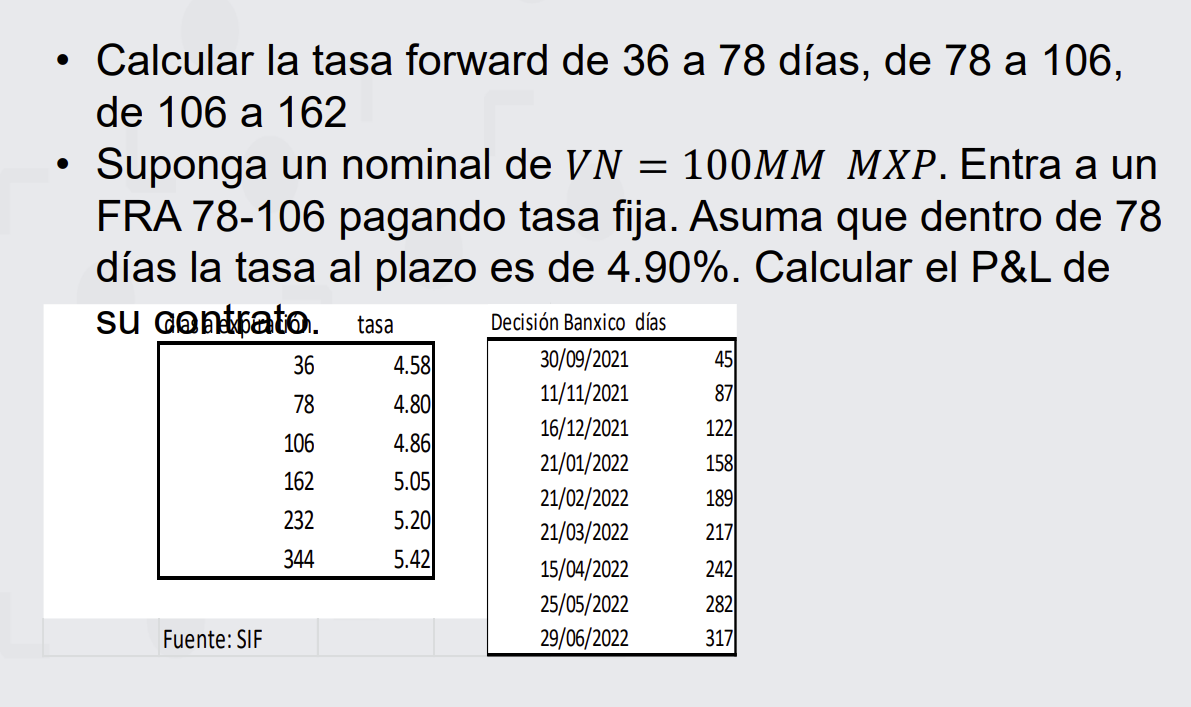

In [ ]:
def tasa_forward(r1, r2, t1, t2):
    """
    Calcula la tasa forward entre dos periodos.

    r1: Tasa de interés al vencimiento t1 (en %).
    r2: Tasa de interés al vencimiento t2 (en %).
    t1: Días al vencimiento t1.
    t2: Días al vencimiento t2.

    Retorna: Tasa forward anualizada en %.
    """
    factor_r1 = 1 + r1 * (t1 / 360) / 100
    factor_r2 = 1 + r2 * (t2 / 360) / 100
    tasa_forward = (factor_r2 / factor_r1 - 1) * (360 / (t2 - t1))
    return tasa_forward * 100

def pnl_fra(nocional, r_float, r_fix, t1, t2):
    """
    Calcula el P&L de un FRA.

    nocional: Valor nominal del FRA.
    r_float: Tasa flotante observada (en %).
    r_fix: Tasa fija pactada (en %).
    t1: Tiempo inicial (en días).
    t2: Tiempo final (en días).

    Retorna: P&L del FRA.
    """
    delta_t = (t2 - t1) / 360
    flujo_neto = nocional * (r_float - r_fix) / 100 * delta_t / (1 + r_float / 100 * delta_t)
    return flujo_neto

# Datos
nocional = 100_000_000
tasas = {36: 4.58, 78: 4.80, 106: 4.86, 162: 5.05}  # Días y tasas
tasa_fija = tasas[78]
tasa_flotante = 4.90
t1 = 78
t2 = 106

# Calcular tasas forward
forward_36_78 = tasa_forward(tasas[36], tasas[78], 36, 78)
forward_78_106 = tasa_forward(tasas[78], tasas[106], 78, 106)
forward_106_162 = tasa_forward(tasas[106], tasas[162], 106, 162)

# Calcular P&L
pnl = pnl_fra(nocional, tasa_flotante, tasa_fija, t1, t2)

# Resultados
print(f"Tasa forward 36-78 días: {forward_36_78:.2f}%")
print(f"Tasa forward 78-106 días: {forward_78_106:.2f}%")
print(f"Tasa forward 106-162 días: {forward_106_162:.2f}%")
print(f"P&L del FRA: {pnl:,.2f} MXP")


Tasa forward 36-78 días: 4.97%
Tasa forward 78-106 días: 4.98%
Tasa forward 106-162 días: 5.33%
P&L del FRA: 7,748.25 MXP


# Interest rate swap

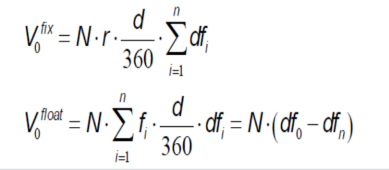

In [ ]:
# Datos de entrada
N = 100_000_000  # Nocional de referencia en la moneda deseada (100MM)
r = 0.05  # Tasa swap fija (5%)
d = 180  # Número de días en cada periodo de cupón
n = 4  # Número de periodos
df = [0.98, 0.96, 0.94, 0.92]  # Factores de descuento para cada periodo
f = [0.045, 0.048, 0.047, 0.046]  # Tasas flotantes para cada periodo

# Cálculo del valor presente de la pata fija (fija paga, recibe tasa fija)
V_fix_0 = N * r * d / 360 * sum(df)
print(f"Valor presente de la pata fija (V_fix_0): {V_fix_0:.2f}")

# Cálculo del valor presente de la pata flotante (flotante paga, recibe tasa flotante)
V_float_0 = N * sum(f[i] * d / 360 * df[i] for i in range(n))
print(f"Valor presente de la pata flotante (V_float_0): {V_float_0:.2f}")

# Cálculo del valor neto (NPV) del swap
npv_swap = V_float_0 - V_fix_0
print(f"Valor neto del swap (NPV): {npv_swap:.2f}")


Valor presente de la pata fija (V_fix_0): 9500000.00
Valor presente de la pata flotante (V_float_0): 8834000.00
Valor neto del swap (NPV): -666000.00


In [ ]:
print(f'Valor presente de la pata fija: {V_fix_0}')
print(f'Valor presente de la pata flotante: {V_float_0}')

Valor presente de la pata fija: 9500000.0
Valor presente de la pata flotante: 8834000.0


Si "V_float_0 - V_fix_0" es positivo, el swap tiene valor positivo para el receptor flotante.

Si "V_float_0 - V_fix_0" es negativo, el swap es favorable para quien paga flotante y recibe fijo.

# POO

In [ ]:
class Persona:
    def __init__(self, nombre, edad, tiempo_a_futuro):
        self.nombre = nombre
        self.edad = edad
        self.edad_despues = self.edad_dentro_x_anios(tiempo_a_futuro)

    def __repr__(self):
        return f"Persona(nombre='{self.nombre}', edad={self.edad})"

    def edad_dentro_x_anios(self, x):
        return self.edad + x

In [ ]:
# Ejemplo de uso
persona = Persona("Juan", 30, 10)
print(persona)

Persona(nombre='Juan', edad=30)


Acceso a un atributo

In [ ]:
persona.edad

30

In [ ]:
persona.edad_dentro_x_anios(50)

80

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
objetito = LinearRegression()
print(objetito)

LinearRegression()


# Ejercicio (PPO):

Cree un objeto que calcule los valores de un Interest Rate Swap.

Que reciba los "Datos de entrada" mostrados arriba y los tenga como atributos, que tenga métodos que calculen el valor presente de la para fija y de la pata variable y que guarde estos como atributos del objeto.

In [ ]:
# Espacio para el ejercicio

# Ejercicio (Pandas)

Haga el calculo de arriba utilizando la iteración sobre una tabla (se puede iterar de muchas maneras, siendo la mas ilustrativa en estre momento utilizar el método ".iloc" o ".loc")

In [ ]:
import pandas as pd

valores = pd.DataFrame({
'factor_descuento' : [0.98, 0.96, 0.94, 0.92],  # Factores de descuento para cada periodo
'tasa_flotante' : [0.045, 0.048, 0.047, 0.046] # Tasas flotantes para cada periodo
})
valores

,factor_descuento,tasa_flotante
0,0.98,0.045
1,0.96,0.048
2,0.94,0.047
3,0.92,0.046


In [ ]:
# Ejemplo de ubicar valor en tabla
valores.loc[2:, 'factor_descuento']

,factor_descuento
2,0.94
3,0.92


In [ ]:
# Hace lo mismo que el de arriba, pero con coordenadas que son números enteros
valores.iloc[2,0]

np.float64(0.94)

In [ ]:
# Espacio para el ejercicio

 # Atributos y Métodos en una tabla: ejemplos

In [ ]:
valores = pd.DataFrame({
'factor_descuento' : [0.98, np.nan, 0.94, 0.92],  # Factores de descuento para cada periodo
'tasa_flotante' : [0.045, 0.048, 0.047, 0.046] # Tasas flotantes para cada periodo
})
valores

,factor_descuento,tasa_flotante
0,0.98,0.045
1,NaN,0.048
2,0.94,0.047
3,0.92,0.046


Atributos

In [ ]:
valores.shape

(4, 2)

In [ ]:
valores.columns

Index(['factor_descuento', 'tasa_flotante'], dtype='object')

In [ ]:
valores.values

array([[0.98 , 0.045],
       [  nan, 0.048],
       [0.94 , 0.047],
       [0.92 , 0.046]])

Métodos

In [ ]:
valores.sum()

,0
factor_descuento,2.840
tasa_flotante,0.186


In [ ]:
nueva_tabla = valores.dropna()

In [ ]:
nueva_tabla

,factor_descuento,tasa_flotante
0,0.98,0.045
2,0.94,0.047
3,0.92,0.046


In [ ]:
valores.dropna(inplace=True)

In [ ]:
valores

,factor_descuento,tasa_flotante
0,0.98,0.045
2,0.94,0.047
3,0.92,0.046
